# Identification of variables and data types

In [25]:
import pandas as pd
data = pd.read_csv("archive/bank-full.csv", sep=",")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [26]:
print(data.shape)
data.dtypes

(45211, 17)


age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

Despite Python returning this informations, this is not quite what we are looking for.

Instead, we need to analyze the data in a more empirical(?) way.

As such, we got:

- age -> Numeric Attribute (Ratio-Scaled) | Client's Age
- job -> Categorical Attribute (Nominal?) | Client's Job
- marital -> Categorial (Nominal?) | Client's Marital Status
- education -> Categorial (Ordinal) | Education Level
- default -> Categorial (Nominal?) | Whether the Client's Credit is in default
- balance -> Numeric (Ratio-Scaled?) | Balance in Client's Account
- housing -> Categorical (Nominal?) | Whether the Client has a Housing Loan
- loan -> Categorial (Nominal) | Whether the Client has a personal Loan
- contact -> Categorial (Nominal?) (seria engra perguntar este ao publico pa ver se eles pensam em phone number) | Type of Client's contact
- day -> Numeric {fgt tem categorical...} (Ratio?) | Last contact with the client
- month -> same as above
- duration -> Numeric (Ratio?) | How long las contact lasted
- campaing -> Numeric (Ratio?) | How many times client was contacted about this campaing
- Pdays -> Numerical (Idk, tricky cause of -1) | how many days it has past since the client was last contacted (-1 means the client wasn’t contacted yet) (WHATT? wual a diff de day-month?)
- Previous -> Numerical (Ratio?) | how many times the client has been contacted about previous campaign
- Poutcome -> Categorical (not sure) | outcome of a past telemarketing deal: success, failure, other or unknown

(maybe tbm descrever o significado de cada suscintamente, como o fgt tem no report)

(if there was) sex -> Categorial (Nominal), aka "dichotomous" ;)

# Statistical Univariate Analysis.

In [27]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [28]:
# há merdas que apesar de ter números, acho que não sao importantes...
#   por isso pode-se fazer assim para as excluir
tempdata = data[['age']]
tempdata.describe()

,age
count,45211.000000
mean,40.936210
std,10.618762
min,18.000000
25%,33.000000
50%,39.000000
75%,48.000000
max,95.000000


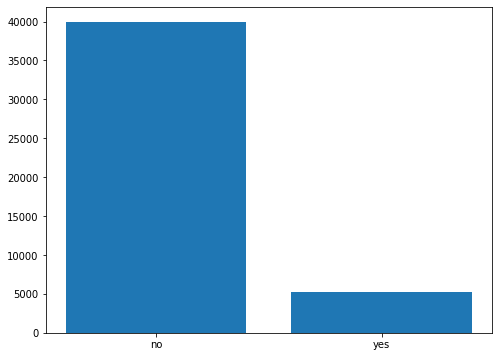

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

data.rename(columns = {'Target': 'y'}, inplace = True)

plt.figure(figsize=(8,6))
plt.bar(data.y.unique(), data['y'].value_counts())
plt.show()

Therefore one can conclude the DS is non-balanced!

In [30]:
def group_by_feature(feature):
  grouped = data.groupby([feature, 'y']).size()
  plt.figure(figsize=(20,6))
  plt.bar(data[feature].unique(), grouped[grouped.index.isin(['no'], level=1)], align='center')
  plt.bar(data[feature].unique(), grouped[grouped.index.isin(['yes'], level=1)], align='center')
  plt.xlabel(feature)
  plt.ylabel("Frequency")
  plt.legend(['no', 'yes'])
  plt.show()

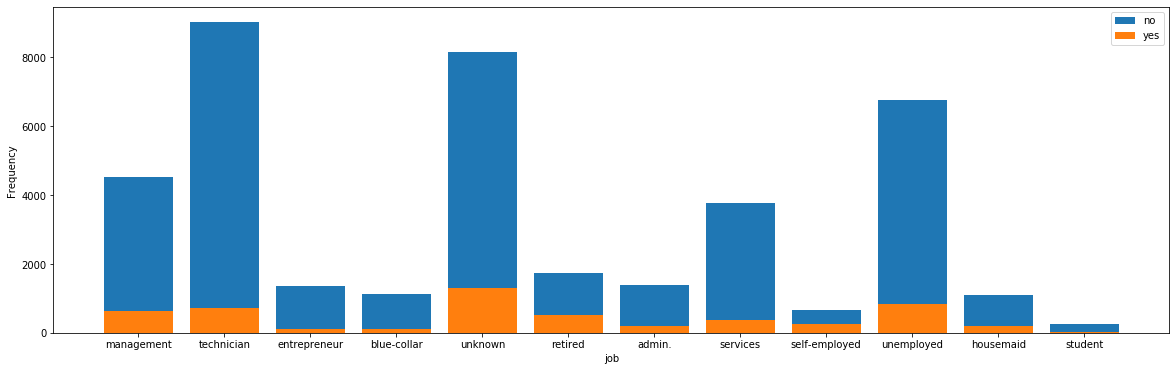

In [31]:
group_by_feature('job')

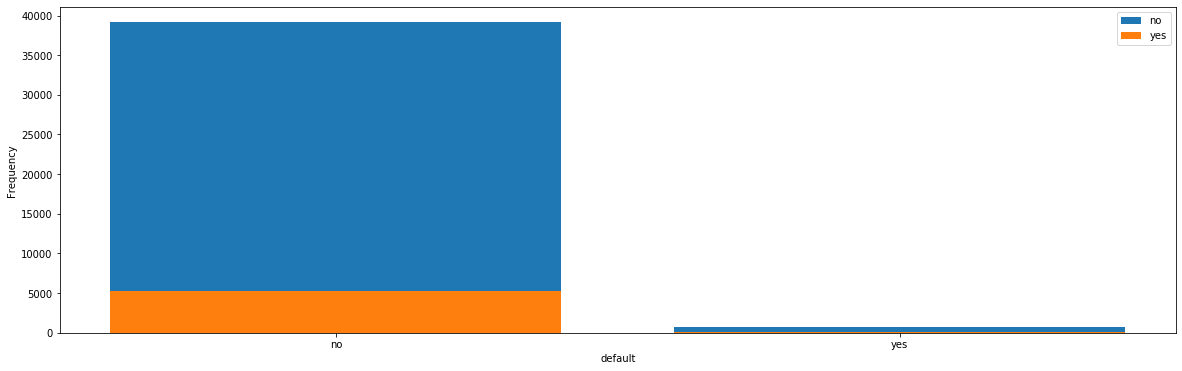

In [32]:
group_by_feature('default')

In [33]:
print("etc etc")

etc etc


In [34]:
# Quais os Diferentes Valores que esta cena pode tomar
data["job"].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

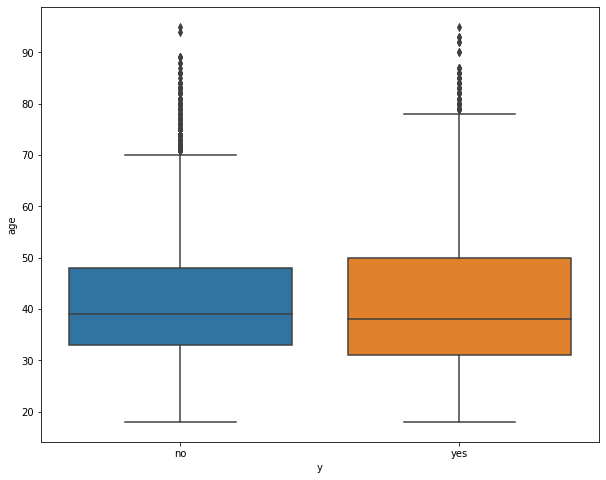

In [39]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.boxplot(data=data, x="y", y="age")

# IDK; FAZER BOXPLOTS PA ESTA RMD TODA(?)
# E SCATTER PA VERIFICAR SO FUCKING OUTLINERS

## Pre-Proccessing

#### Drop Duplicates
> interessante explicar porque na eventual apresentação ;)

In [35]:
data.drop_duplicates()
data.shape

(45211, 17)

#### Check Nulls (Missing Values)

In [36]:
missing = data.isnull().values.any()
print("Missing Values? ", missing)

Missing Values?  False


## Variable Transformation

#### How to Convert Categorical to Numerical


In [37]:
# 1 way
data["job"] = data["job"].astype('category')
data["job"] = data["job"].cat.codes
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,9,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,2,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,1,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,11,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Normalization

(TBD)

## DATASET SEPARATION

In [38]:
from sklearn.model_selection import train_test_split
x_rest, x_test, y_rest, y_test = train_test_split(data.loc[:, data.columns != 'y'], data['y'], test_size=0.2)
x_train, x_cv, y_train, y_cv = train_test_split(x_rest, y_rest, test_size=0.25)
print("Sizes of the sets: ")
print("\tTrain features:", x_train.shape)
print("\tTrain label:", y_train.shape)
print("\tCV features:", x_cv.shape)
print("\tCV label:", y_cv.shape)
print("\tTest features:", x_test.shape)
print("\tTest label:", y_test.shape)

Sizes of the sets: 
	Train features: (27126, 16)
	Train label: (27126,)
	CV features: (9042, 16)
	CV label: (9042,)
	Test features: (9043, 16)
	Test label: (9043,)
